Notebook is copyright &copy; of <a href="https://ajaytech.co">Ajay Tech</a>.

# Multi layer Perceptron

## Contents

In the last chapter, we have seen how a single perceptron can solve a linearly separable data classification problem. Let's check out a small problem that is not linearly separable. 

The data for XOR gate looks like this.

In [6]:
## XOR gate data
import numpy as np

x = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])

# numpy has a built in operator called logical_xor that can calculate the XOR operation of two arrays.
# This returns a True or False 
y = np.logical_xor(x[:,0], x[:,1])

# convert the returned True/False to integers
y = y.astype(int)

y

array([0, 1, 1, 0])

Let's plot this out and see if the data is linearly separable.

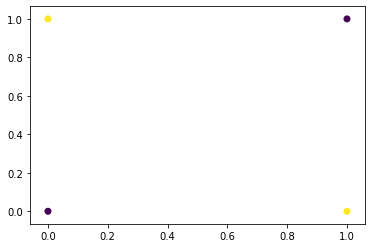

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(x[:,0],x[:,1],c=y)

As you can see from this visual, you cannot use a single hyperplane (a line in case of 2-d data) to classify the XOR data. So, by definition, a single perceptron cannot solve this. 

<img src="./pics/xor-data-not-linearly-separable.png"/>

However, a combination of perceptrons can solve this. Let's code this in Python. This time, let's write this as a class.

In [15]:
import numpy as np

class TwoLayerPerceptron :
    
    def __init__ (self,input_nodes, hidden_nodes, 
                  output_nodes, learning_rate = 0.001) :
        
        # structure of the NN. These variables represent the number of nodes
        # in each of the layers of the NN
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        
        # learning rate
        self.learning_rate = learning_rate
        
        # weights matrix
        # ih = input-> hidden & ho = hidden-> output
        self.weights_ih = np.random.normal(loc = 0.0, 
                                           scale = 2,
                                           size = (self.input_nodes, self.hidden_nodes))
        self.weights_ho = np.random.normal(loc = 0.0, 
                                           scale = 2,
                                           size = (self.hidden_nodes, self.output_nodes))        
    def forward_prop(self, record) :
        #input->hidden layer
        weighted_sum  = np.dot(record,self.weights_ih)
        # apply activation function in the hidden layer
        hidden_output = weighted_sum >=0  # this returns a True or False
        self.hidden_output = hidden_output.astype(int)
        
        #hidden->output layer
        weighted_sum  = np.dot(hidden_output,self.weights_ho)
        #apply activation function in the output layer
        output_output = weighted_sum >=0  
        output_output = output_output.astype(int)
        self.y_hat = output_output
    
    def backward_prop(self, record, index) :
        
        # we start off with the error in the output layer(y - y_hat)
        output_error = y[index] - self.y_hat
        
        # update the weights between the hidden layer and output layer
        self.weights_ho += self.learning_rate * np.dot( np.transpose(self.hidden_output), output_error) 
        
        # error in the hidden layer
        hidden_error = np.dot(self.weights_ho.T, output_error)
        
        # update the weights between the input layer and hidden layer
        self.weights_ih += self.learning_rate * np.dot(np.transpose(record), hidden_error)
        pass

        # this is where training happens
    def fit(self,X,y,epoch = 1000) :
        for i in range(epoch) :
            # run forward and back prop for each row of data
            for index, record in enumerate(X):
                self.forward_prop(record)
                self.backward_prop(record, index)
        pass
    
    # given the input data, predict the output by doing forward_prop        
    def predict(X):
        
        y = [] # to hold the predicted output        
        for record in X :
            y.append(self.forward_prop(record))
        return y

In [16]:
nn = TwoLayerPerceptron(2,2,1)
nn.fit(x,y)

ValueError: shapes (2,) and (1,) not aligned: 2 (dim 0) != 1 (dim 0)

In [5]:
nn.learning_rate

0.001

In [31]:
wih = np.random.normal(loc = 0.0, scale = 2,size = (3, 2))

In [32]:
wih

array([[-3.25132759, -1.69621472],
       [ 1.73657056, -1.92146063],
       [ 2.07086691, -0.79877659]])

In [20]:
pow(3, 0.5)

1.7320508075688772

  #### $w_{1 new} = w_{1 old} + \alpha \times x_1 \times (y - \hat y) $

In [19]:
a = [1,2]

b = np.array(a,ndmin=2)


In [20]:
b.shape

(1, 2)